<a href="https://colab.research.google.com/github/ErycaFMS/introduction-to-data-science/blob/main/05_logistic_regression_performance_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

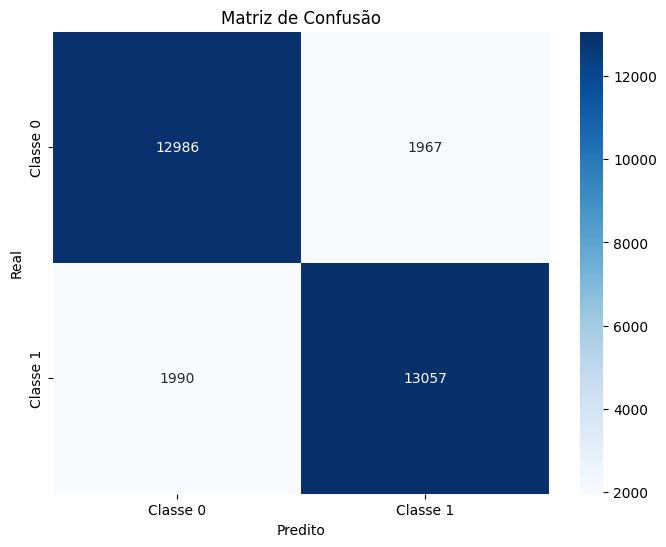

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     14953
           1       0.87      0.87      0.87     15047

    accuracy                           0.87     30000
   macro avg       0.87      0.87      0.87     30000
weighted avg       0.87      0.87      0.87     30000



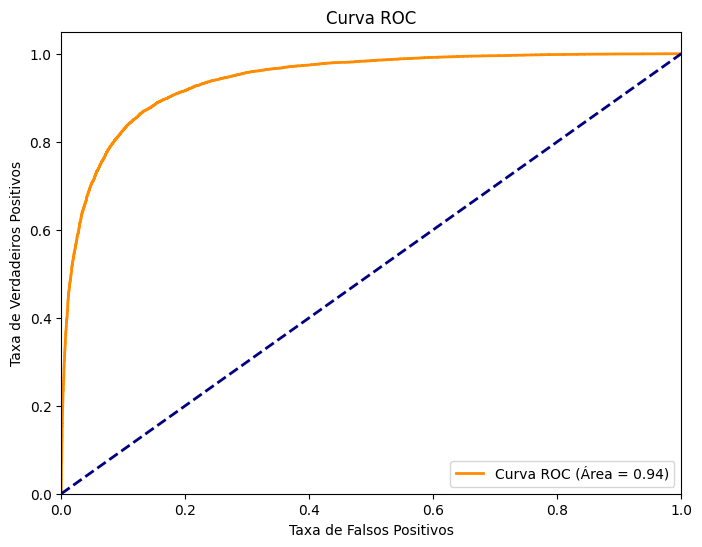

Acurácia do modelo: 0.87
AUC da Curva ROC: 0.94
Conclusão:
Neste notebook, criamos um conjunto de dados sintéticos para classificação binária e treinamos um modelo de Regressão Logística. A avaliação do modelo foi realizada usando a Matriz de Confusão e a Curva ROC.
A acurácia do modelo foi de 0.87, o que indica que o modelo está performando bem no conjunto de dados de teste.
A AUC da Curva ROC foi de 0.94, o que demonstra uma boa capacidade de discriminação do modelo.
Essas métricas ajudam a compreender a performance do modelo e a sua capacidade de distinguir entre as classes.


In [2]:
# Importando bibliotecas necessárias
import numpy as np  # Biblioteca para operações numéricas e manipulação de arrays
import pandas as pd  # Biblioteca para manipulação e análise de dados estruturados
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
from sklearn.datasets import make_classification  # Função para criar conjuntos de dados sintéticos para classificação
from sklearn.model_selection import train_test_split  # Função para dividir os dados em conjuntos de treino e teste
from sklearn.linear_model import LogisticRegression  # Implementação do modelo de Regressão Logística
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report  # Funções para avaliação de modelos
import seaborn as sns  # Biblioteca para visualização de dados, que fornece uma interface de alto nível para criar gráficos atraentes

# Passo 1: Criação do Conjunto de Dados Sintéticos
# Gerando um conjunto de dados sintético para classificação binária
X, y = make_classification(
    n_samples=100000,  # Número de amostras no conjunto de dados
    n_features=20,  # Número de características (features) para cada amostra
    random_state=42  # Semente para garantir a reprodutibilidade dos resultados
)

# Passo 2: Divisão do Conjunto de Dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Dados de entrada
    y,  # Rótulos de saída
    test_size=0.3,  # Proporção dos dados a serem usados para o teste (30%)
    random_state=42  # Semente para garantir a reprodutibilidade da divisão
)

# Passo 3: Treinamento do Algoritmo no Conjunto de Treino
model = LogisticRegression(
    max_iter=1000,  # Número máximo de iterações para o algoritmo de otimização
    random_state=42  # Semente para garantir a reprodutibilidade dos resultados
)
model.fit(X_train, y_train)  # Treinamento do modelo com os dados de treino

# Passo 4: Teste do Algoritmo no Conjunto de Teste
y_pred = model.predict(X_test)  # Previsões do modelo para o conjunto de teste
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades estimadas para a classe positiva

# Passo 5: Aplicação das Métricas de Avaliação

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)  # Criação da matriz de confusão comparando previsões e valores reais
plt.figure(figsize=(8,6))  # Configuração do tamanho da figura
sns.heatmap(
    cm,  # Dados da matriz de confusão
    annot=True,  # Adiciona anotações aos quadrados da matriz
    fmt='d',  # Formato das anotações (d para inteiro)
    cmap='Blues',  # Mapa de cores para o gráfico
    xticklabels=['Classe 0', 'Classe 1'],  # Rótulos para o eixo x
    yticklabels=['Classe 0', 'Classe 1']  # Rótulos para o eixo y
)
plt.title('Matriz de Confusão')  # Título do gráfico
plt.xlabel('Predito')  # Rótulo do eixo x
plt.ylabel('Real')  # Rótulo do eixo y
plt.show()  # Exibe o gráfico

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # Calcula a taxa de falsos positivos e a taxa de verdadeiros positivos
roc_auc = roc_auc_score(y_test, y_prob)  # Calcula a AUC (Área sob a Curva)

# Relatório de Classificação
report = classification_report(y_test, y_pred)  # Cria um relatório detalhado de métricas de desempenho
print("Relatório de Classificação:")  # Imprime título
print(report)  # Imprime o relatório

# Gráfico da Curva ROC
plt.figure(figsize=(8,6))  # Configuração do tamanho da figura
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (Área = %0.2f)' % roc_auc)  # Plota a Curva ROC
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal de referência (modelo aleatório)
plt.xlim([0.0, 1.0])  # Limites do eixo x
plt.ylim([0.0, 1.05])  # Limites do eixo y
plt.xlabel('Taxa de Falsos Positivos')  # Rótulo do eixo x
plt.ylabel('Taxa de Verdadeiros Positivos')  # Rótulo do eixo y
plt.title('Curva ROC')  # Título do gráfico
plt.legend(loc='lower right')  # Localização da legenda
plt.show()  # Exibe o gráfico


# Passo 6: Comentários sobre os Resultados
# Acurácia e AUC esperadas
accuracy = model.score(X_test, y_test)  # Calcula a acurácia do modelo no conjunto de teste
print(f"Acurácia do modelo: {accuracy:.2f}")  # Imprime a acurácia
print(f"AUC da Curva ROC: {roc_auc:.2f}")  # Imprime a AUC da Curva ROC

# Passo 7: Conclusão
print("Conclusão:")
print("Neste notebook, criamos um conjunto de dados sintéticos para classificação binária e treinamos um modelo de Regressão Logística. A avaliação do modelo foi realizada usando a Matriz de Confusão e a Curva ROC.")
print("A acurácia do modelo foi de {:.2f}, o que indica que o modelo está performando bem no conjunto de dados de teste.".format(accuracy))
print("A AUC da Curva ROC foi de {:.2f}, o que demonstra uma boa capacidade de discriminação do modelo.".format(roc_auc))
print("Essas métricas ajudam a compreender a performance do modelo e a sua capacidade de distinguir entre as classes.")
